In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [43]:
rng = np.random.RandomState(42)

In [44]:
#training set

X_train = 0.2 * rng.randn(1000,2)
X_train = np.r_[X_train+3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

In [45]:
#testing set (normal observations)
X_test = 0.2 * rng.randn(200,2)
X_test = np.r_[X_test+3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

In [46]:
#outliers generation
x_outliers = rng.uniform(low = -1, high = 5, size = (50,2))
x_outliers = pd.DataFrame(x_outliers, columns = ['x1', 'x2'])


True


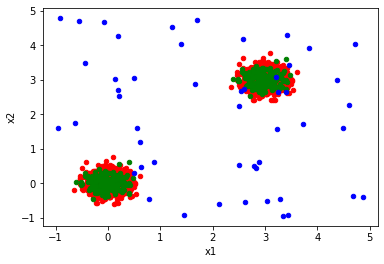

In [47]:
ax1 = X_train.plot(kind='scatter', x='x1', y='x2', color='r')    
ax2 = X_test.plot(kind='scatter', x='x1', y='x2', color='g', ax=ax1)    
ax3 = x_outliers.plot(kind='scatter', x='x1', y='x2', color='b', ax=ax1)

print(ax1 == ax2 == ax3)

In [48]:
# training the model on isolation Forest
clf = IsolationForest(max_samples = 100, random_state= rng)
clf.fit(X_train)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x7F3AB8F76E40)

In [49]:
#predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(x_outliers)

In [50]:
y_pred_train

array([ 1, -1,  1, ...,  1,  1,  1])

In [51]:
# performance metrics
print("Accuracy",list(y_pred_test).count(1)/y_pred_test.shape[0])

Accuracy 0.575


In [52]:
print("Acuuracy_outliers", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Acuuracy_outliers 0.98
